<a href="https://colab.research.google.com/github/KlebersonMariaCC/cdp_2022.2/blob/main/Classifica%C3%A7%C3%A3o_de_risco_de_UTI_para_pacientes_com_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Baixando os dados da planilha:

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ennSgW6YXjlmg9As_TCqr6ZfspIrUk3t' -O Kaggle_Sirio_Libanes_ICU_Prediction.csv


--2023-05-02 17:19:27--  https://docs.google.com/uc?export=download&id=1ennSgW6YXjlmg9As_TCqr6ZfspIrUk3t
Resolving docs.google.com (docs.google.com)... 172.253.63.101, 172.253.63.100, 172.253.63.139, ...
Connecting to docs.google.com (docs.google.com)|172.253.63.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-cc-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/e05vjufbraqo6v003d3jue8cuqs4t6v1/1683047925000/08186528177780336079/*/1ennSgW6YXjlmg9As_TCqr6ZfspIrUk3t?e=download&uuid=4cdd2f49-f7ad-4128-82be-0828cc7307df [following]
--2023-05-02 17:19:28--  https://doc-0o-cc-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/e05vjufbraqo6v003d3jue8cuqs4t6v1/1683047925000/08186528177780336079/*/1ennSgW6YXjlmg9As_TCqr6ZfspIrUk3t?e=download&uuid=4cdd2f49-f7ad-4128-82be-0828cc7307df
Resolving doc-0o-cc-docs.googleusercontent.com (doc-0o-cc-docs.googleusercontent.com)... 142.251.111.132, 2607:f8b0

###Importando as bibliotecas:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate

###Carregando os dados:

In [ ]:
dados = pd.read_csv('Kaggle_Sirio_Libanes_ICU_Prediction.csv')
dados

,RESPIRATORY_RATE_MAX,RESPIRATORY_RATE_MEAN,WINDOW,AGE_PERCENTIL,OTHER,BLOODPRESSURE_SISTOLIC_MAX,BLOODPRESSURE_DIASTOLIC_MIN,HTN,RESPIRATORY_RATE_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,...,RESPIRATORY_RATE_MIN,BLOODPRESSURE_DIASTOLIC_MAX,GENDER,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_DIFF_REL,BLOODPRESSURE_DIASTOLIC_MEAN.1,TEMPERATURE_MEAN,IMMUNOCOMPROMISED,OXYGEN_SATURATION_MAX,ICU
0,-0.575758,-0.525424,6,10,1.0,-0.740541,-0.051546,0.0,-0.517241,-0.259259,...,-0.428571,-0.487179,0,-0.630769,-1.000000,-0.259259,0.285714,0.0,0.631579,0
1,0.212121,0.355932,4,80,1.0,-0.329730,0.175258,1.0,0.379310,0.012346,...,0.500000,-0.299145,0,-0.046154,-1.000000,0.012346,-0.464286,0.0,0.842105,0
2,-0.515152,-0.549005,12,10,1.0,-0.567568,-0.175258,0.0,-0.517241,-0.131508,...,-0.500000,-0.247863,0,-0.538462,-0.708718,-0.131508,-0.201863,0.0,0.842105,0
3,-0.454545,-0.389831,4,10,0.0,-0.524324,0.072165,0.0,-0.379310,-0.111111,...,-0.285714,-0.384615,0,-0.323077,-1.000000,-0.111111,0.107143,0.0,0.578947,1
4,NaN,NaN,4,70,1.0,-0.610811,-0.010309,0.0,NaN,-0.209877,...,NaN,-0.452991,1,-0.446154,-1.000000,-0.209877,0.178571,1.0,0.894737,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,-0.151515,-0.283293,0,90,0.0,-0.232432,0.134021,0.0,-0.172414,0.382716,...,-0.357143,0.094017,1,-0.138462,-0.909438,0.382716,-0.010204,0.0,0.842105,1
1728,-0.272727,-0.513317,12,20,1.0,-0.394595,-0.175258,0.0,-0.517241,0.024250,...,-0.785714,-0.111111,0,-0.384615,-0.576502,0.024250,0.408801,0.0,0.894737,0
1729,-0.575758,-0.525424,0,60,1.0,-0.783784,-0.175258,1.0,-0.517241,-0.407407,...,-0.428571,-0.589744,1,-0.692308,-1.000000,-0.407407,-0.250000,0.0,0.894737,0
1730,0.030303,-0.397519,12,70,1.0,-0.178378,-0.134021,0.0,-0.448276,-0.044419,...,-0.642857,-0.145299,0,-0.184615,-0.593543,-0.044419,-0.076951,0.0,1.000000,1


##1. Realize uma análise exploratória dos dados, identificando e descrevendo:

   

### Resumo dos dados

In [ ]:
dados.describe()

,RESPIRATORY_RATE_MAX,RESPIRATORY_RATE_MEAN,WINDOW,AGE_PERCENTIL,OTHER,BLOODPRESSURE_SISTOLIC_MAX,BLOODPRESSURE_DIASTOLIC_MIN,HTN,RESPIRATORY_RATE_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,...,RESPIRATORY_RATE_MIN,BLOODPRESSURE_DIASTOLIC_MAX,GENDER,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_DIFF_REL,BLOODPRESSURE_DIASTOLIC_MEAN.1,TEMPERATURE_MEAN,IMMUNOCOMPROMISED,OXYGEN_SATURATION_MAX,ICU
count,1060.000000,1060.000000,1732.000000,1732.000000,1728.000000,1116.000000,1116.000000,1728.000000,1060.000000,1116.000000,...,1060.000000,1116.000000,1732.000000,1116.000000,1116.000000,1116.000000,1110.000000,1728.000000,1115.000000,1732.000000
mean,-0.313379,-0.436035,4.773672,52.263279,0.810764,-0.399332,-0.039815,0.206597,-0.432531,-0.091232,...,-0.479515,-0.233480,0.364896,-0.335891,-0.818795,-0.091232,0.068329,0.160301,0.816875,0.271363
std,0.403651,0.222846,4.128726,27.158179,0.391809,0.285553,0.278976,0.404981,0.231473,0.251233,...,0.283436,0.270912,0.481540,0.280830,0.267039,0.251233,0.241714,0.366991,0.143602,0.444791
min,-1.000000,-1.000000,0.000000,10.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000
25%,-0.575758,-0.553073,2.000000,30.000000,1.000000,-0.578378,-0.201031,0.000000,-0.517241,-0.255556,...,-0.642857,-0.418803,0.000000,-0.538462,-1.000000,-0.255556,-0.097110,0.000000,0.736842,0.000000
50%,-0.454545,-0.500000,4.000000,50.000000,1.000000,-0.459459,-0.030928,0.000000,-0.517241,-0.098765,...,-0.500000,-0.247863,0.000000,-0.384615,-0.987911,-0.098765,0.035714,0.000000,0.842105,0.000000
75%,-0.151515,-0.375939,6.000000,80.000000,1.000000,-0.243243,0.175258,0.000000,-0.379310,0.086420,...,-0.357143,-0.076923,1.000000,-0.200000,-0.664947,0.086420,0.214286,0.000000,0.894737,1.000000
max,1.000000,1.000000,12.000000,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 ## 1. Correlações entre as variáveis preditoras;


### Matriz de correlação:

In [ ]:
correlation = dados.corr()
correlation

,RESPIRATORY_RATE_MAX,RESPIRATORY_RATE_MEAN,WINDOW,AGE_PERCENTIL,OTHER,BLOODPRESSURE_SISTOLIC_MAX,BLOODPRESSURE_DIASTOLIC_MIN,HTN,RESPIRATORY_RATE_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,...,RESPIRATORY_RATE_MIN,BLOODPRESSURE_DIASTOLIC_MAX,GENDER,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_DIFF_REL,BLOODPRESSURE_DIASTOLIC_MEAN.1,TEMPERATURE_MEAN,IMMUNOCOMPROMISED,OXYGEN_SATURATION_MAX,ICU
RESPIRATORY_RATE_MAX,1.000000,0.632017,0.492789,0.187827,0.146146,0.557851,-0.523338,0.152707,0.555033,-0.147542,...,-0.120234,0.432073,-0.047147,0.087366,0.634696,-0.147542,-0.026287,0.070667,0.322822,0.585035
RESPIRATORY_RATE_MEAN,0.632017,1.000000,-0.032372,0.194678,-0.015314,0.174010,-0.109301,0.093365,0.978896,-0.096100,...,0.638453,-0.002151,-0.091059,0.153539,0.056708,-0.096100,0.097561,0.043876,-0.111056,0.421110
WINDOW,0.492789,-0.032372,1.000000,0.005086,0.146375,0.458666,-0.526963,0.085902,-0.071932,-0.056927,...,-0.558265,0.527067,0.017736,-0.091313,0.771103,-0.056927,-0.193823,0.011406,0.458128,0.338605
AGE_PERCENTIL,0.187827,0.194678,0.005086,1.000000,0.109672,0.294626,-0.149545,0.323106,0.183539,-0.173290,...,0.074978,-0.022384,0.064035,0.285794,0.032476,-0.173290,-0.115583,0.199367,-0.031602,0.235115
OTHER,0.146146,-0.015314,0.146375,0.109672,1.000000,0.140289,-0.178611,0.246530,-0.033449,-0.049350,...,-0.160311,0.139275,0.032507,-0.023559,0.228892,-0.049350,-0.039395,0.186925,0.114332,-0.053319
BLOODPRESSURE_SISTOLIC_MAX,0.557851,0.174010,0.458666,0.294626,0.140289,1.000000,-0.192382,0.269916,0.138066,0.264926,...,-0.322255,0.697790,-0.048445,0.683311,0.573379,0.264926,-0.087203,0.050832,0.308664,0.377576
BLOODPRESSURE_DIASTOLIC_MIN,-0.523338,-0.109301,-0.526963,-0.149545,-0.178611,-0.192382,1.000000,-0.110710,-0.068383,0.774304,...,0.383371,0.003115,-0.098832,0.377181,-0.595901,0.774304,0.099522,-0.096090,-0.403403,-0.391431
HTN,0.152707,0.093365,0.085902,0.323106,0.246530,0.269916,-0.110710,1.000000,0.079091,-0.021474,...,-0.019227,0.104138,-0.028400,0.205588,0.126004,-0.021474,-0.099584,0.178329,0.069544,0.163498
RESPIRATORY_RATE_MEDIAN,0.555033,0.978896,-0.071932,0.183539,-0.033449,0.138066,-0.068383,0.079091,1.000000,-0.084969,...,0.655099,-0.033439,-0.094162,0.153417,0.006850,-0.084969,0.114903,0.037409,-0.134094,0.378412
BLOODPRESSURE_DIASTOLIC_MEAN,-0.147542,-0.096100,-0.056927,-0.173290,-0.049350,0.264926,0.774304,-0.021474,-0.084969,1.000000,...,0.019974,0.564638,-0.117894,0.501409,-0.088592,1.000000,-0.000706,-0.105277,-0.110119,-0.236274


Uma matriz muito grande, dificil de analisar, vamos tranformá-la num mapa de calor:

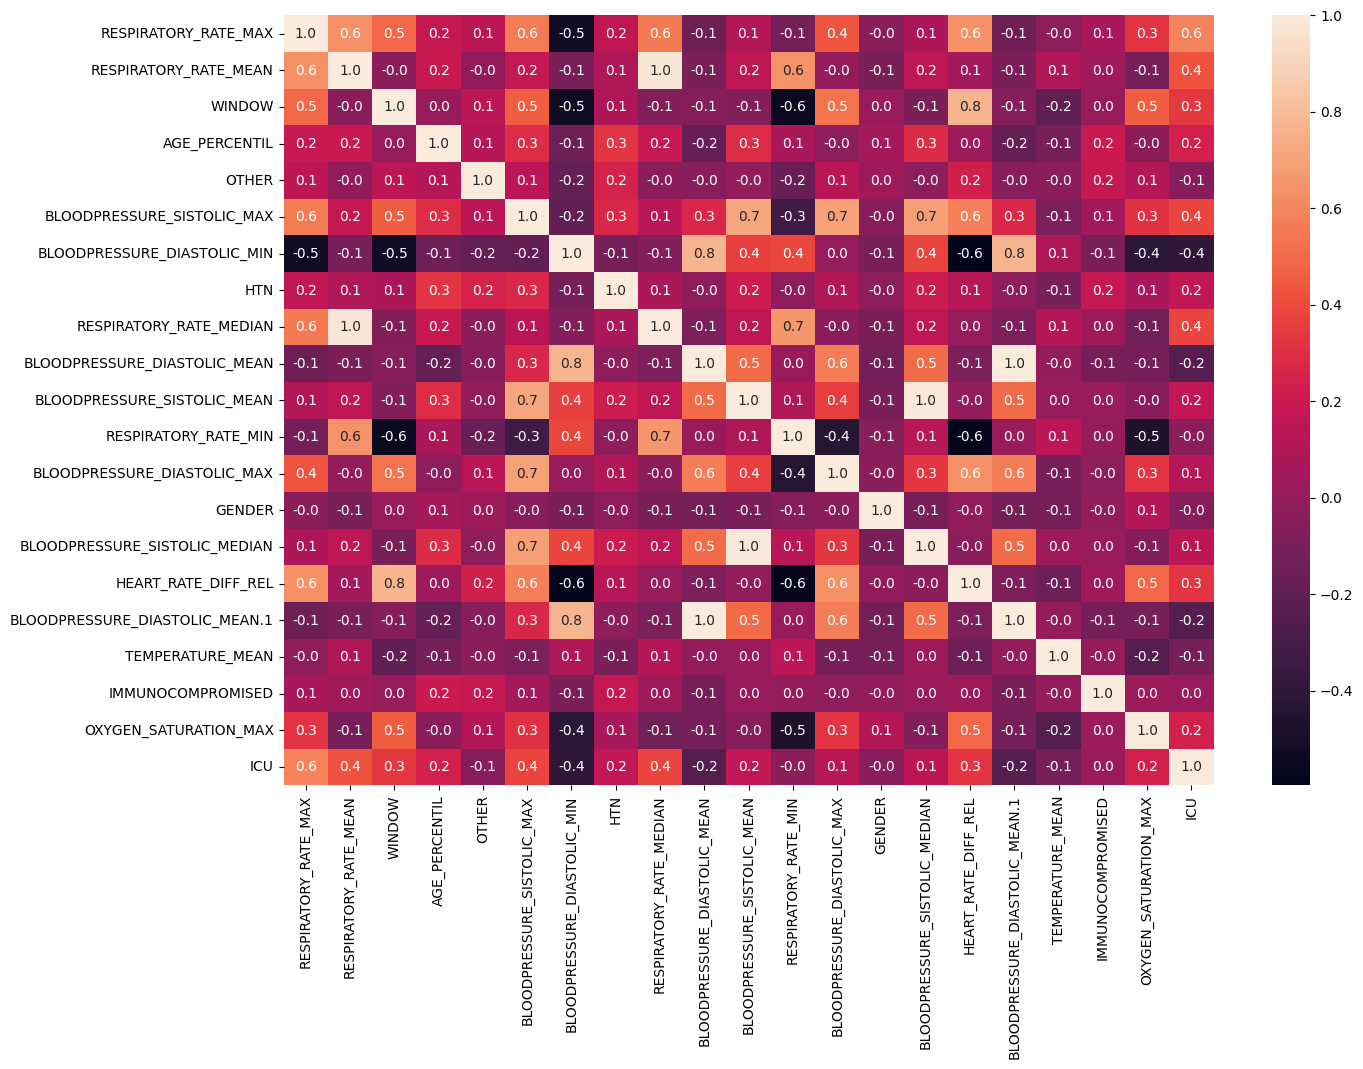

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation, annot=True, fmt=".1f")
plt.show()

Ainda assim os dados são muito grandes, vamos focar nas correlações em relação ao ICU, a variavel alvo:

In [ ]:
correlation = dados.corrwith(dados['ICU'])
correlation.sort_values(ascending=False)

ICU                               1.000000
RESPIRATORY_RATE_MAX              0.585035
RESPIRATORY_RATE_MEAN             0.421110
RESPIRATORY_RATE_MEDIAN           0.378412
BLOODPRESSURE_SISTOLIC_MAX        0.377576
WINDOW                            0.338605
HEART_RATE_DIFF_REL               0.325664
OXYGEN_SATURATION_MAX             0.236707
AGE_PERCENTIL                     0.235115
HTN                               0.163498
BLOODPRESSURE_SISTOLIC_MEAN       0.158733
BLOODPRESSURE_SISTOLIC_MEDIAN     0.148920
BLOODPRESSURE_DIASTOLIC_MAX       0.122824
IMMUNOCOMPROMISED                 0.016513
RESPIRATORY_RATE_MIN             -0.035211
GENDER                           -0.049901
OTHER                            -0.053319
TEMPERATURE_MEAN                 -0.111893
BLOODPRESSURE_DIASTOLIC_MEAN     -0.236274
BLOODPRESSURE_DIASTOLIC_MEAN.1   -0.236274
BLOODPRESSURE_DIASTOLIC_MIN      -0.391431
dtype: float64

## 2. valores ausentes:

In [ ]:
empties = dados.isnull().mean()
empties.sort_values(ascending= False)

RESPIRATORY_RATE_MAX              0.387991
RESPIRATORY_RATE_MEAN             0.387991
RESPIRATORY_RATE_MEDIAN           0.387991
RESPIRATORY_RATE_MIN              0.387991
TEMPERATURE_MEAN                  0.359122
OXYGEN_SATURATION_MAX             0.356236
BLOODPRESSURE_DIASTOLIC_MEAN.1    0.355658
HEART_RATE_DIFF_REL               0.355658
BLOODPRESSURE_SISTOLIC_MEDIAN     0.355658
BLOODPRESSURE_DIASTOLIC_MAX       0.355658
BLOODPRESSURE_SISTOLIC_MEAN       0.355658
BLOODPRESSURE_DIASTOLIC_MEAN      0.355658
BLOODPRESSURE_DIASTOLIC_MIN       0.355658
BLOODPRESSURE_SISTOLIC_MAX        0.355658
HTN                               0.002309
OTHER                             0.002309
IMMUNOCOMPROMISED                 0.002309
GENDER                            0.000000
AGE_PERCENTIL                     0.000000
WINDOW                            0.000000
ICU                               0.000000
dtype: float64

Nota-se que há uma ausência razoável dos dados, da ordem de 35-38%. Isso pode afetar consideravalmente nosso modelo Lembrando dos tipos das variáveis:

In [ ]:
dados.dtypes.sort_values(ascending= False)

RESPIRATORY_RATE_MAX              float64
RESPIRATORY_RATE_MEAN             float64
OXYGEN_SATURATION_MAX             float64
IMMUNOCOMPROMISED                 float64
TEMPERATURE_MEAN                  float64
BLOODPRESSURE_DIASTOLIC_MEAN.1    float64
HEART_RATE_DIFF_REL               float64
BLOODPRESSURE_SISTOLIC_MEDIAN     float64
BLOODPRESSURE_DIASTOLIC_MAX       float64
RESPIRATORY_RATE_MIN              float64
BLOODPRESSURE_SISTOLIC_MEAN       float64
BLOODPRESSURE_DIASTOLIC_MEAN      float64
RESPIRATORY_RATE_MEDIAN           float64
HTN                               float64
BLOODPRESSURE_DIASTOLIC_MIN       float64
BLOODPRESSURE_SISTOLIC_MAX        float64
OTHER                             float64
GENDER                              int64
AGE_PERCENTIL                       int64
WINDOW                              int64
ICU                                 int64
dtype: object

Se ainda estiver ruim de visualizar podemos fazer um heatmap dos dados faltantes:

<Axes: >

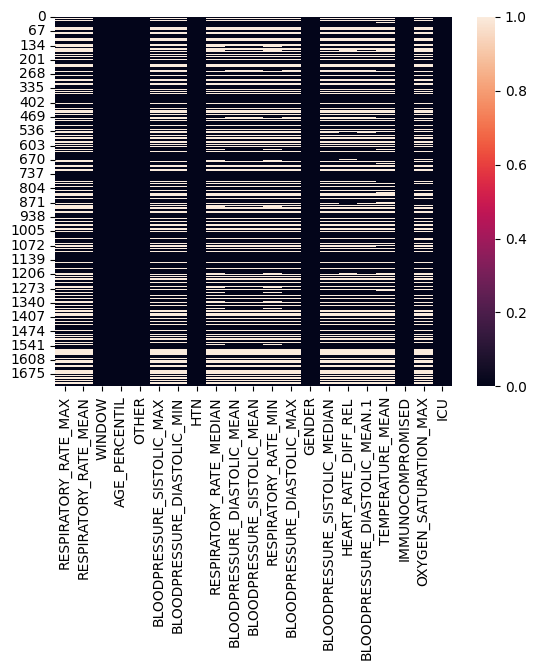

In [ ]:
sns.heatmap(dados.isnull())

Onde a cor branca representa os dados faltantes.Como podemos ver as colunas com tipo inteiro (as possiveis categóricas) estão completas.Assim podemos lidar ocm os dados ausentes com estrategias mais diversificadas. Em particular, usaremos interpolação.

In [ ]:
df = dados.interpolate()
df.isnull().sum()

RESPIRATORY_RATE_MAX              0
RESPIRATORY_RATE_MEAN             0
WINDOW                            0
AGE_PERCENTIL                     0
OTHER                             0
BLOODPRESSURE_SISTOLIC_MAX        0
BLOODPRESSURE_DIASTOLIC_MIN       0
HTN                               0
RESPIRATORY_RATE_MEDIAN           0
BLOODPRESSURE_DIASTOLIC_MEAN      0
BLOODPRESSURE_SISTOLIC_MEAN       0
RESPIRATORY_RATE_MIN              0
BLOODPRESSURE_DIASTOLIC_MAX       0
GENDER                            0
BLOODPRESSURE_SISTOLIC_MEDIAN     0
HEART_RATE_DIFF_REL               0
BLOODPRESSURE_DIASTOLIC_MEAN.1    0
TEMPERATURE_MEAN                  0
IMMUNOCOMPROMISED                 0
OXYGEN_SATURATION_MAX             0
ICU                               0
dtype: int64

O que prova que não temos nehum dado faltante, tambem poderiamos fazer o heatmap:

<Axes: >

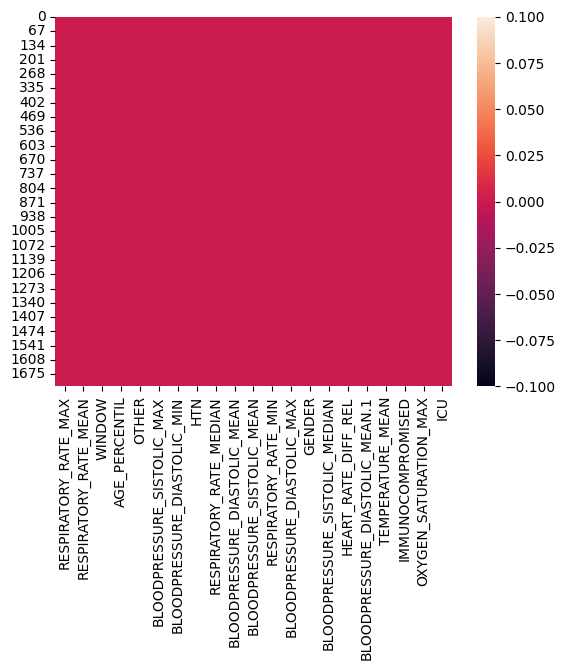

In [ ]:
sns.heatmap(df.isnull())

###Fazendo o houldout:

In [ ]:
x = df.loc[:,dados.columns != 'ICU']
y = df.ICU
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2)
print(x_train.shape)
print(x_validation.shape)


(1385, 20)
(347, 20)


## 2. Divida os dados de treino usando a técnica holdout (80/20) em treino e validação, para  o cálculo das métricas. Baseando-se na análise feita anteriormente, utilizando todos os atributos disponíveis, treine e faça fine-tuning os seguintes modelos conforme uma validação cruzada k-folds:

Para realizarmos a validação cruzada usaremos o método cross_validate, onde ele internamente faz a divisão dos dados e o executa, gerando as métricas que forem solicitadas. Por conveniência as metricas usadas serão as mesmas solicitadas para os dados de validação na questão 3 , tendo em vista que facilitará a comparação.Lembrado que para os valores das métricas escolhidas, quanto mais próximo de 1 melhor o modelo segundo à métrica em questão.

### 1. Um modelo de Regressão Logística;

In [ ]:
modelo1 = LogisticRegression()
modelo1.fit(x_train,y_train)
metricas1 = cross_validate(modelo1,x_train,y_train, scoring = ('precision', 'recall', 'accuracy', 'f1'), cv = 5)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
metricas1

{'fit_time': array([0.0315578 , 0.03242064, 0.03146839, 0.03193307, 0.03862906]),
 'score_time': array([0.00877309, 0.00913477, 0.00903797, 0.00921202, 0.0093801 ]),
 'test_precision': array([0.74074074, 0.70769231, 0.7962963 , 0.71666667, 0.75      ]),
 'test_recall': array([0.51282051, 0.58974359, 0.55128205, 0.5443038 , 0.53164557]),
 'test_accuracy': array([0.81227437, 0.81588448, 0.83393502, 0.80866426, 0.81588448]),
 'test_f1': array([0.60606061, 0.64335664, 0.65151515, 0.61870504, 0.62222222])}

Onde fit time e score time são metricas de desempenho/execução da maquina. Não iremos focar nelas neste trabalho.

In [ ]:
metricas1_train = {key : value.mean() for key, value in metricas1.items()}
metricas1_train

{'fit_time': 0.03320178985595703,
 'score_time': 0.009107589721679688,
 'test_precision': 0.7422792022792023,
 'test_recall': 0.5459591041869523,
 'test_accuracy': 0.8173285198555955,
 'test_f1': 0.6283719318251693}

###2. Um modelo de Naive Bayes;

In [ ]:
modelo2 = GaussianNB()
modelo2.fit(x_train,y_train)
metricas2 = cross_validate(modelo2, x_train, y_train, scoring = ('precision', 'recall', 'accuracy', 'f1'), cv = 5)
metricas2

{'fit_time': array([0.00509501, 0.00349998, 0.00349808, 0.00346732, 0.00346828]),
 'score_time': array([0.00858259, 0.0085566 , 0.00843954, 0.00850105, 0.00669837]),
 'test_precision': array([0.71929825, 0.63076923, 0.64383562, 0.61111111, 0.63888889]),
 'test_recall': array([0.52564103, 0.52564103, 0.6025641 , 0.69620253, 0.58227848]),
 'test_accuracy': array([0.80866426, 0.77978339, 0.79422383, 0.78700361, 0.78700361]),
 'test_f1': array([0.60740741, 0.57342657, 0.62251656, 0.65088757, 0.60927152])}

In [ ]:
metricas2_train = {key : value.mean() for key, value in metricas2.items()}
metricas2_train

{'fit_time': 0.003805732727050781,
 'score_time': 0.008155632019042968,
 'test_precision': 0.6487806185643243,
 'test_recall': 0.5864654333008763,
 'test_accuracy': 0.7913357400722022,
 'test_f1': 0.6127019268537354}

### 3. Um modelo de Árvore de Decisão;

In [ ]:
modelo3 = DecisionTreeClassifier()
modelo3.fit(x_train,y_train)
metricas3 = cross_validate(modelo3, x_train, y_train, scoring = ('precision', 'recall', 'accuracy', 'f1'), cv = 5)
metricas3

{'fit_time': array([0.0148108 , 0.01205015, 0.0131216 , 0.01307607, 0.01370811]),
 'score_time': array([0.00597692, 0.00752616, 0.00619364, 0.00583029, 0.0059824 ]),
 'test_precision': array([0.62962963, 0.54666667, 0.6125    , 0.63829787, 0.60810811]),
 'test_recall': array([0.65384615, 0.52564103, 0.62820513, 0.75949367, 0.56962025]),
 'test_accuracy': array([0.79422383, 0.74368231, 0.7833935 , 0.80866426, 0.77256318]),
 'test_f1': array([0.64150943, 0.53594771, 0.62025316, 0.69364162, 0.58823529])}

In [ ]:
metricas3_train = {key : value.mean() for key, value in metricas3.items()}
metricas3_train

{'fit_time': 0.013353347778320312,
 'score_time': 0.0063018798828125,
 'test_precision': 0.6070404553489659,
 'test_recall': 0.6273612463485881,
 'test_accuracy': 0.7805054151624549,
 'test_f1': 0.6159174447104567}

### 4. Um outro modelo à sua escolha, dentre os disponíveis na API do Scikit-Learn;

Para este caso particular usaremos o DummyClassifier o que também será um boa métrica, já que poderemos comparar os outros odelos com o "acaso". Usaremos a estrategia uniforme onde todas as classe tem mesma chance de ocorrer. Como nesse caso a classificação é binária, seria o mesmo que jogar cara ou coroa para cada dado e ai dividir os dados estas classes.

In [ ]:
modelo4 = DummyClassifier(strategy='uniform')
modelo4.fit(x_train,y_train)
metricas4 = cross_validate(modelo4, x_train, y_train, scoring = ('precision', 'recall', 'accuracy', 'f1'), cv = 5)
metricas4

{'fit_time': array([0.00142837, 0.0007813 , 0.00074339, 0.0007503 , 0.00075388]),
 'score_time': array([0.00608325, 0.00491619, 0.00469923, 0.00468802, 0.00477934]),
 'test_precision': array([0.30935252, 0.26174497, 0.24615385, 0.27210884, 0.20300752]),
 'test_recall': array([0.55128205, 0.5       , 0.41025641, 0.50632911, 0.34177215]),
 'test_accuracy': array([0.52707581, 0.46209386, 0.4801444 , 0.47292419, 0.42960289]),
 'test_f1': array([0.39631336, 0.34361233, 0.30769231, 0.3539823 , 0.25471698])}

In [ ]:
metricas4_train = {key : value.mean() for key, value in metricas4.items()}
metricas4_train

{'fit_time': 0.0008914470672607422,
 'score_time': 0.0050332069396972655,
 'test_precision': 0.25847353858336364,
 'test_recall': 0.4619279454722493,
 'test_accuracy': 0.4743682310469314,
 'test_f1': 0.33126345771328014}

Por essas metricas podemos observar que todos os modelos estão ao menos acima do acaso.

##3. Identifique os valores de Precision, Recall, Acurácia e F1-Score no conjunto de validação para os modelos utilizados. Existe diferença entre o desempenho no treino e na validação? Descreva o entendimento e justifique os resultados obtidos.

Vamos fazer as metricas para os dados de teste para cada modelo:

In [ ]:
y_pred_1 = modelo1.predict(x_validation)
y_pred_2 = modelo2.predict(x_validation)
y_pred_3 = modelo3.predict(x_validation)
y_pred_4 = modelo4.predict(x_validation)

validation = []


Regressão  Logistica (modelo 1):

In [ ]:
precision_1 = precision_score(y_validation, y_pred_1)
recall_1 = recall_score(y_validation, y_pred_1)
accuracy_1 = accuracy_score(y_validation, y_pred_1)
f1_1 = f1_score(y_validation, y_pred_1)

validation.append([precision_1, recall_1, accuracy_1, f1_1])

print(precision_1, recall_1, accuracy_1, f1_1)


0.6935483870967742 0.5512820512820513 0.8443804034582133 0.6142857142857143


Naive Bayes (modelo 2):

In [ ]:
precision_2 = precision_score(y_validation, y_pred_2)
recall_2 = recall_score(y_validation, y_pred_2)
accuracy_2 = accuracy_score(y_validation, y_pred_2)
f1_2 = f1_score(y_validation, y_pred_2)

validation.append([precision_2, recall_2, accuracy_2, f1_2])

print(precision_2, recall_2, accuracy_2, f1_2)

0.5421686746987951 0.5769230769230769 0.7953890489913544 0.5590062111801242


Árvore de Decisão (modelo 3):

In [ ]:
precision_3 = precision_score(y_validation, y_pred_3)
recall_3 = recall_score(y_validation, y_pred_3)
accuracy_3 = accuracy_score(y_validation, y_pred_3)
f1_3 = f1_score(y_validation, y_pred_3)

validation.append([precision_3, recall_3, accuracy_3, f1_3])

print(precision_3, recall_3, accuracy_3, f1_3)

0.5540540540540541 0.5256410256410257 0.7982708933717579 0.5394736842105263


DummyClasssifier (modelo 4):

In [ ]:
precision_4 = precision_score(y_validation, y_pred_4)
recall_4 = recall_score(y_validation, y_pred_4)
accuracy_4 = accuracy_score(y_validation, y_pred_4)
f1_4 = f1_score(y_validation, y_pred_4)

validation.append([precision_4, recall_4, accuracy_4, f1_4])

print(precision_4, recall_4, accuracy_4, f1_4)

0.2484472049689441 0.5128205128205128 0.5417867435158501 0.33472803347280333


Vamos fazer um resumo:

In [ ]:
modelos = {"Regressão Logistica": metricas1_train, "Naive Bayes": metricas2_train, "Árvore de Decisão": metricas3_train, "DummyClassifier": metricas4_train}
testes = ['test_precision', 'test_recall', 'test_accuracy','test_f1' ]

for modelo, metricas in modelos.items():
  i = 0
  print(f'{modelo} \n')
  for j in range(len(testes)):
    print(f'  {testes[i]} \n')
    print(f'    treino: {metricas[testes[j]]} , validação : {validation[i][j]} \n')
    i+=1

Regressão Logistica 

  test_precision 

    treino: 0.7422792022792023 , validação : 0.6935483870967742 

  test_recall 

    treino: 0.5459591041869523 , validação : 0.5769230769230769 

  test_accuracy 

    treino: 0.8173285198555955 , validação : 0.7982708933717579 

  test_f1 

    treino: 0.6283719318251693 , validação : 0.33472803347280333 

Naive Bayes 

  test_precision 

    treino: 0.6487806185643243 , validação : 0.6935483870967742 

  test_recall 

    treino: 0.5864654333008763 , validação : 0.5769230769230769 

  test_accuracy 

    treino: 0.7913357400722022 , validação : 0.7982708933717579 

  test_f1 

    treino: 0.6127019268537354 , validação : 0.33472803347280333 

Árvore de Decisão 

  test_precision 

    treino: 0.6070404553489659 , validação : 0.6935483870967742 

  test_recall 

    treino: 0.6273612463485881 , validação : 0.5769230769230769 

  test_accuracy 

    treino: 0.7805054151624549 , validação : 0.7982708933717579 

  test_f1 

    treino: 0.6159174

Analisando os resultados, temos que as metricas dos dados de teste foram bem similares, entre todos os modelos, a exceção do dummy classfier que houve um ganho grande entre treio e validação. essa difrença peqena pode ter sido ao fato da validação cruzada retirar o vies dos dados, tornado bem proximos do real, ou tambem podemos ter uma base de dados balanceada (a iterpolação talvez?). no fim os resultados foram bem proximos, o que é indicativo que podemos ter ahcado os parâmetros (ou talvez hiperparâmetros) ideiais.

